In [1]:
# Arthur Gustavo de La Fonte Albuquerque em 2021.03.02
# Algoritmo Random Forest

<img src="self_checkout.png">

### Description

### Problem Statemtent

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?


### Data Description

Columns:

    area_type
    availability
    location
    size
    society
    total_sqft
    bath
    balcony
    price

### Business objectives and constraints

1. The cost of a mis-classification can be high.
2. There is strict latency concerns.
3. From this project we will able to understand how house prices depend on other factors. 

### Importing Liabraries

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data from the CSV file

In [24]:
# Carregamento da base de dados e criação dos previsores (variáveis independentes - X) e da classe (variável dependente - y)
credito = pd.read_csv('train.csv', sep = '|')
#redito.head()
credito.shape

(1879, 10)

In [4]:
previsores = credito.iloc[:,0:8].values
classe = credito.iloc[:,9].values
previsores

array([[5.00000000e+00, 1.05400000e+03, 5.47000000e+01, ...,
        3.00000000e+00, 2.75142315e-02, 5.18975332e-02],
       [3.00000000e+00, 1.08000000e+02, 2.73600000e+01, ...,
        4.00000000e+00, 1.29629630e-01, 2.53333333e-01],
       [3.00000000e+00, 1.51600000e+03, 6.21600000e+01, ...,
        5.00000000e+00, 8.57519789e-03, 4.10026385e-02],
       ...,
       [4.00000000e+00, 3.16000000e+02, 4.18300000e+01, ...,
        1.00000000e+00, 9.49367089e-02, 1.32373418e-01],
       [2.00000000e+00, 6.85000000e+02, 6.26800000e+01, ...,
        2.00000000e+00, 3.50364964e-02, 9.15036496e-02],
       [4.00000000e+00, 1.14000000e+03, 3.80300000e+01, ...,
        3.00000000e+00, 1.66666667e-02, 3.33596491e-02]])

In [5]:
# Não foi necessário essa função 
#Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada atributo categórico
#labelencoder = LabelEncoder()
#previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
#previsores[:,2] = labelencoder.fit_transform(previsores[:,2])


In [5]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [6]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 1000)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(n_estimators=1000)

In [7]:
# Visualização dos atributos principais
floresta.estimators_
#floresta.estimators_[1]

[DecisionTreeClassifier(max_features='auto', random_state=939174839),
 DecisionTreeClassifier(max_features='auto', random_state=1772479599),
 DecisionTreeClassifier(max_features='auto', random_state=405977725),
 DecisionTreeClassifier(max_features='auto', random_state=1877558302),
 DecisionTreeClassifier(max_features='auto', random_state=2014899658),
 DecisionTreeClassifier(max_features='auto', random_state=696675144),
 DecisionTreeClassifier(max_features='auto', random_state=1423765755),
 DecisionTreeClassifier(max_features='auto', random_state=1898368807),
 DecisionTreeClassifier(max_features='auto', random_state=279901462),
 DecisionTreeClassifier(max_features='auto', random_state=726536534),
 DecisionTreeClassifier(max_features='auto', random_state=1153981238),
 DecisionTreeClassifier(max_features='auto', random_state=1255272201),
 DecisionTreeClassifier(max_features='auto', random_state=269522571),
 DecisionTreeClassifier(max_features='auto', random_state=1006505507),
 DecisionTre

In [8]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.9609929078014184

In [9]:
# Carregamento da base de dados e criação dos previsores (variáveis independentes - X) e da classe (variável dependente - y)
test = pd.read_csv('test.csv', sep = '|')
test.head()

trustLevel  totalScanTimeInSeconds  grandTotal  lineItemVoids  \
0           4                     467       88.48              4   
1           3                    1004       58.99              7   
2           1                     162       14.00              4   
3           5                     532       84.79              9   
4           5                     890       42.16              4   

   scansWithoutRegistration  quantityModifications  scannedLineItemsPerSecond  \
0                         8                      4                   0.014989   
1                         6                      1                   0.026892   
2                         5                      4                   0.006173   
3                         3                      4                   0.026316   
4                         0                      0                   0.021348   

   valuePerSecond  lineItemVoidsPerPosition  
0        0.189465                  0.571429  
1        0.058755                  0.259259  
2        0.086420                  4.000000  
3        0.159380                  0.642857  
4        0.047371                  0.210526

In [10]:
prevguga = test.iloc[:,0:8].values
prevguga

array([[4.00000000e+00, 4.67000000e+02, 8.84800000e+01, ...,
        4.00000000e+00, 1.49892934e-02, 1.89464668e-01],
       [3.00000000e+00, 1.00400000e+03, 5.89900000e+01, ...,
        1.00000000e+00, 2.68924303e-02, 5.87549801e-02],
       [1.00000000e+00, 1.62000000e+02, 1.40000000e+01, ...,
        4.00000000e+00, 6.17283951e-03, 8.64197531e-02],
       ...,
       [3.00000000e+00, 3.00000000e+02, 5.41000000e+00, ...,
        4.00000000e+00, 3.00000000e-02, 1.80333333e-02],
       [2.00000000e+00, 1.52400000e+03, 3.39700000e+01, ...,
        3.00000000e+00, 5.90551181e-03, 2.22900262e-02],
       [3.00000000e+00, 1.45600000e+03, 5.69700000e+01, ...,
        2.00000000e+00, 1.92307692e-02, 3.91277473e-02]])

In [12]:
prevresults = floresta.predict(prevguga)

In [13]:
prevresults.shape

(498121,)

(array([486379.,  11742.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

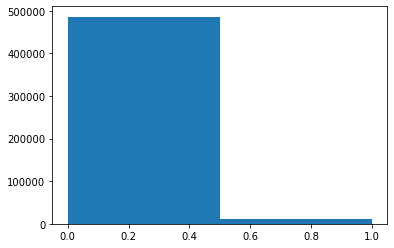

In [23]:
prevresults
plt.hist(prevresults, bins = 2)